# The t-Distribution <hr style="border:2.px solid #Ff0cb"></hr>

Data Analyst: Charles Ian Gabriel M. Guevarra <br>
Department: Electrical Engineering

In [11]:
# import and packages
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [12]:
# load dataset
df = pd.read_csv(r"transformer-voltage.csv")
df

,Sample,Voltage
0,1,119.8
1,2,120.3
2,3,154.0
3,4,119.5
4,5,120.2
5,6,119.9
6,7,120.4
7,8,119.6
8,9,120.1
9,10,119.7


In [13]:
# summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sample   30 non-null     int64  
 1   Voltage  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [14]:
# summary statistics
df.describe()

,Sample,Voltage
count,30.000000,30.000000
mean,15.500000,120.000000
std,8.803408,9.978425
min,1.000000,93.300000
25%,8.250000,119.700000
50%,15.500000,119.950000
75%,22.750000,120.200000
max,30.000000,154.000000


In [15]:
# t-critical for two-tailed test
alpha = 0.05
dof = df['Voltage'].count() - 1

t_crit = stats.t.ppf(1 - alpha/2, dof)
t_crit


np.float64(2.045229642132703)

In [16]:
# confidence interval 
ci_lower, ci_upper = stats.t.interval(
    confidence = 0.95,
    df = df['Voltage'].count() - 1,
    loc = df['Voltage'].mean(),
    scale = df['Voltage'].std() / np.sqrt(df['Voltage'].count())
)

In [17]:
ci_lower

np.float64(116.27399486913444)

In [18]:
ci_upper

np.float64(123.72600513086556)

In [19]:
print("Confidence_Interval = " + str(ci_lower.round(2)) + " , " + str(ci_upper.round(2))) 

Confidence_Interval = 116.27 , 123.73


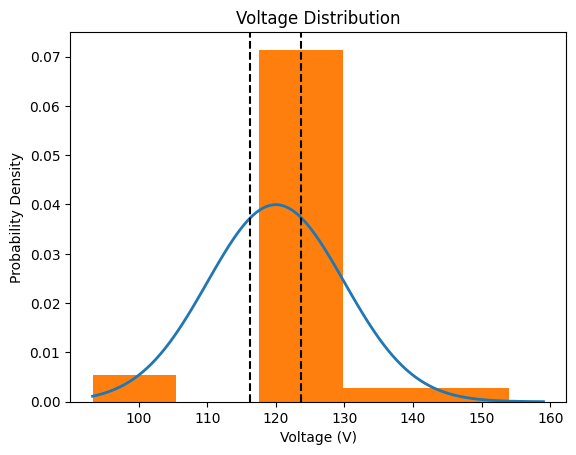

In [23]:
# voltage distribution
mean = df['Voltage'].mean()
std = df['Voltage'].std(ddof=1)


# x-axis
x_min = df['Voltage'].min() 
x_max = df['Voltage'].max() + 5

# normal distribution
x = np.linspace(x_min, x_max, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x,p,linewidth=2)

# histogram
plt.hist(df['Voltage'], bins=5, density=True,)
plt.title('Voltage Distribution')
plt.ylabel('Probability Density')
plt.xlabel('Voltage (V)')

# confidence interval
plt.axvline(x=ci_lower, color='k',linestyle='--')
plt.axvline(x=ci_upper, color='k',linestyle='--')
plt.show()